In [89]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [90]:
import numpy as np
import pandas as pd

In [91]:
import datetime as dt

In [92]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [93]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [94]:
Base = automap_base()

Base.prepare(engine, reflect=True)

In [95]:
Base.classes.keys()

['measurement', 'station']

In [96]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [97]:
session = Session(engine)

In [98]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

precipitation_data = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(precipitation_data)

('2017-08-23',)


In [99]:
# Calculate the date 1 year ago from today

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [100]:
# Perform a query to retrieve the data and precipitation scores

precipitation = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > year_ago).\
order_by(Measurement.date).all()

In [101]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_df = pd.DataFrame(precipitation)
precipitation_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [102]:
# Sort the dataframe by date

precipitation_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


<IPython.core.display.Javascript object>


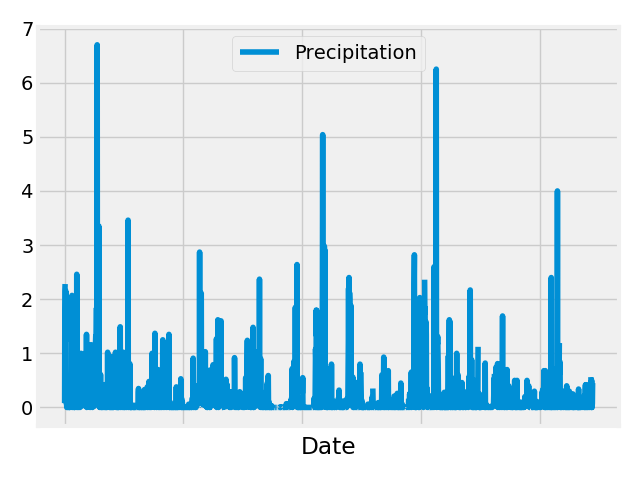

In [107]:
# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.legend(["Precipitation"])

# Rotate the xticks for the dates

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [104]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [105]:
# How many stations are available in this dataset?

locations = session.query(Measurement).group_by(Measurement.station).count()
print("{}".format(locations))

9


In [106]:
# What are the most active stations?
# List the stations and the counts in descending order.

active_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()
    
busiest = active_station[0][0]

for station, count in active_station:
    print(station,count)

USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511


In [87]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?



In [88]:
# Choose the station with the highest number of temperature observations.



In [ ]:
app = Flask(__name__)

@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start>"
        f"/api/v1.0/<start>/<end>"
        
    )


@app.route("/api/v1.0/precipitation")
def precipitation():
    """Return a list of precipitation data"""


    return jsonify


@app.route("/api/v1.0/stations")
def stations():
    """Return a list of stations"""


    return jsonify


@app.route("/api/v1.0/tobs")
def tobs():
    
    return jsonify


if __name__ == '__main__':
    app.run(debug=True)
